In [53]:


list_videos_path = './list_videos.txt'

# Open the file in write mode
with open(list_videos_path, 'r') as file:

    list_videos = file.readlines()

    list_videos = [i[:-1] for i in list_videos]
    
# Close the file
file.close()


print(list_videos[:5])

['L01_V001', 'L01_V002', 'L01_V003', 'L01_V004', 'L01_V005']


Make dir

In [12]:
import os
# os.makedirs('./obj_each_frame/a')

if not(os.path.exists('./obj_each_frame/' + list_videos[0])):
    for i in list_videos:
        os.makedirs('./obj_each_frame/' + i)
        # break
        

# Export each frame

In [55]:
import json

def count_class_entities(file_path, threshold = 0):
  """Counts the number of detection_class_entities in a JSON file.

  Args:
    file_path: The path to the JSON file.

  Returns:
    A dictionary of the class names and the number of times they appear in the
    JSON file.
  """

  with open(file_path, "r") as f:
    data = json.load(f)

  class_counts = {}
  i = 0
  for class_entity in data["detection_class_entities"]:
  # for class_name, class_entity in zip(data["detection_class_names"],
                                      # data["detection_class_entities"]):
    if (threshold != 0):
      if (float(data["detection_scores"][i]) < threshold):
        continue
    if class_entity not in class_counts:
      class_counts[class_entity] = 0
    class_counts[class_entity] += 1
    
    i += 1

  return class_counts


def export_classes_frame(json_in = "./L01_V001/0001.json", json_out = "class_counts.json", threshold = 0):
  """ count number of each class in frame, export to json

  Args:
      json_in (str, optional): _description_. Defaults to "./L01_V001/0001.json".
      json_out (str, optional): _description_. Defaults to "class_counts.json".
  """
  class_counts = count_class_entities(json_in, threshold = threshold)

  tmp_keys = list(class_counts.keys())
  tmp_keys.sort()
  
  class_counts = {i: class_counts[i] for i in tmp_keys}

  with open(json_out, "w") as f:
    json.dump(class_counts, f)
    
def get_name_from_path(file_path = "./L01_V001/0001.json"):
  pass




extract for each frame

In [17]:
import os 

dir_obj_raw = './'

dir_obj_frame = './obj_each_frame/'

for i in list_videos:
    dir_vid = dir_obj_raw + i + '/'
    for file_frame in os.listdir(dir_vid):
        if file_frame.endswith('.json'):
            file_path = os.path.join(dir_vid, file_frame)
            export_classes_frame(file_path, dir_obj_frame + i + '/objs_' + i + '_' + file_frame[:-5] + '.json')
        # break
    # break
    


In [15]:
# sort object in video L01
sorted(data.items(), key=lambda x: x[1], reverse=True)

[('Clothing', 2232),
 ('Person', 1705),
 ('Human arm', 1136),
 ('Man', 1101),
 ('Skyscraper', 900),
 ('Human face', 791),
 ('Tower', 791),
 ('Woman', 655),
 ('Building', 639),
 ('Poster', 544),
 ('Human head', 526),
 ('Human hair', 489),
 ('Human body', 474),
 ('Furniture', 465),
 ('Mammal', 430),
 ('Human hand', 418),
 ('Tree', 371),
 ('Window', 362),
 ('Table', 339),
 ('Fashion accessory', 318),
 ('Vehicle', 296),
 ('Girl', 288),
 ('Human eye', 278),
 ('Footwear', 267),
 ('Plant', 264),
 ('Land vehicle', 246),
 ('Chair', 238),
 ('Human leg', 215),
 ('Toy', 210),
 ('Food', 210),
 ('House', 203),
 ('Boy', 203),
 ('Flag', 187),
 ('Human nose', 185),
 ('Car', 184),
 ('Dress', 157),
 ('Office supplies', 157),
 ('Billboard', 156),
 ('Wheel', 155),
 ('Auto part', 153),
 ('Suit', 139),
 ('Book', 135),
 ('Flower', 134),
 ('Snack', 134),
 ('Glasses', 120),
 ('Picture frame', 120),
 ('Human mouth', 113),
 ('Sports equipment', 97),
 ('Shirt', 94),
 ('Dessert', 94),
 ('Fast food', 93),
 ('Sports 

## Extract with threshold

Human face
Clothing
Girl
Woman
Window


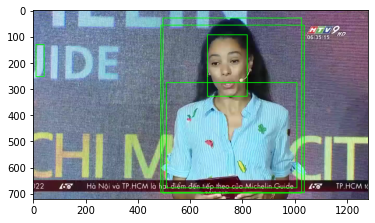

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

threshold = 0.3



def draw_detection_boxes(image, detection_boxes, threshold = 0.3):
  """Vẽ các hộp phát hiện trong hình ảnh.

  Args:
    image: Hình ảnh đầu vào.
    detection_boxes: Danh sách các hộp phát hiện, mỗi hộp là một mảng 4 chiều
      [xmin, ymin, xmax, ymax].

  Returns:
    Hình ảnh đầu ra với các hộp phát hiện được tô màu.
  """

  i = 0
  for box in detection_boxes["detection_boxes"]:
    
    if (float(detection_boxes["detection_scores"][i]) < threshold):
      continue
    
    # print(detection_boxes["detection_class_entities"][i])
    
    ymin, xmin, ymax, xmax = [float(i) for i in box]
    
    height, width, _ = image.shape
    x1_pixel = int(xmin * width)
    y1_pixel = int(ymin * height)
    x2_pixel = int(xmax * width)
    y2_pixel = int(ymax * height)
    # print (xmax)
    cv2.rectangle(image, (x1_pixel, y1_pixel), (x2_pixel, y2_pixel), (0, 255, 0), 2)
    i += 1

  return image


# Đọc dữ liệu JSON
with open('./L01_V002/0079.json') as f:
  detection_boxes = json.load(f)

# Đọc hình ảnh đầu vào
image = cv2.imread("../Keyframes_L01/keyframes/L01_V002/0079.jpg")

# Vẽ các hộp phát hiện
image = draw_detection_boxes(image, detection_boxes, threshold = 0.3)

# # Hiển thị hình ảnh
# cv2.imshow("Detection boxes", image)
# cv2.waitKey(0)


plt.imshow(image[: , : , ::-1])
plt.show()

In [56]:
import os 

dir_obj_raw = './'

dir_obj_frame = './obj_each_frame_thr03/'

thr = 0.3

for i in list_videos:
    dir_vid = dir_obj_raw + i + '/'
    for file_frame in os.listdir(dir_vid):
        if file_frame.endswith('.json'):
            file_path = os.path.join(dir_vid, file_frame)
            export_classes_frame(file_path, dir_obj_frame + i + '/objs_' + i + '_' + file_frame[:-5] + '_thr03.json', thr)
        # break
    break
    


# Association Rules

## For L01_V001

In [16]:
import os
import json

from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

dir_extractedvid = './obj_each_frame_thr03/L01_V001/'

list_objs = []

for file_frame in os.listdir(dir_extractedvid):
    if file_frame.endswith('.json'):
        
        file_path = os.path.join(dir_extractedvid, file_frame)
        # print (file_path)
        
        with open(file_path, "r") as f:
            data = json.load(f)
    
    
        list_objs += [list(data.keys())]

        # print (list_objs)
        # break
        
print (list_objs[:10])


[['Flag', 'Traffic sign'], ['Clothing', 'Footwear', 'Human face', 'Man', 'Person', 'Woman'], ['Clothing', 'Human face', 'Man', 'Person', 'Skyscraper', 'Woman'], ['Lamp'], ['Flag'], ['Clothing', 'Man', 'Woman'], ['Person', 'Tree'], ['Clothing', 'Man', 'Person', 'Poster'], ['Clothing', 'Food', 'Human foot', 'Human leg', 'Person'], ['Human face', 'Jug', 'Kettle', 'Vehicle']]


In [20]:
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(list_objs).transform(list_objs)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

df

,Airplane,Animal,Auto part,Baked goods,Boat,Book,Bottle,Bowl,Box,Boy,...,Tower,Toy,Traffic sign,Tree,Truck,Vase,Vehicle,Wheel,Window,Woman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,True,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,True,0,0,True


In [21]:
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df

Processing 20 combinations | Sampling itemset size 4


c:\Users\OS\miniconda3\envs\hcmai\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.745763,(Clothing)
1,0.644068,(Human face)
2,0.533898,(Man)
3,0.491525,(Person)
4,0.317797,(Woman)
5,0.597458,"(Clothing, Human face)"
6,0.512712,"(Clothing, Man)"
7,0.398305,"(Person, Clothing)"
8,0.313559,"(Clothing, Woman)"
9,0.461864,"(Human face, Man)"


In [22]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Clothing),(Human face),0.745763,0.644068,0.597458,0.801136,1.243870,0.117136,1.789831,0.771158
1,(Human face),(Clothing),0.644068,0.745763,0.597458,0.927632,1.243870,0.117136,3.513097,0.550827
2,(Clothing),(Man),0.745763,0.533898,0.512712,0.687500,1.287698,0.114550,1.491525,0.878788
3,(Man),(Clothing),0.533898,0.745763,0.512712,0.960317,1.287698,0.114550,6.406780,0.479339
4,(Person),(Clothing),0.491525,0.745763,0.398305,0.810345,1.086599,0.031744,1.340524,0.156738
5,(Woman),(Clothing),0.317797,0.745763,0.313559,0.986667,1.323030,0.076558,19.067797,0.357898
6,(Human face),(Man),0.644068,0.533898,0.461864,0.717105,1.343150,0.117998,1.647615,0.717781
7,(Man),(Human face),0.533898,0.644068,0.461864,0.865079,1.343150,0.117998,2.638086,0.548123
8,(Person),(Human face),0.491525,0.644068,0.322034,0.655172,1.017241,0.005458,1.032203,0.033333
9,(Woman),(Human face),0.317797,0.644068,0.279661,0.880000,1.366316,0.074978,2.966102,0.392998
